In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from src.config import dados_tratados, dados_treino_tratados

In [50]:
df = pd.read_csv(dados_tratados)
df_teste = pd.read_csv(dados_treino_tratados)

In [5]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Exterior1st_Wd Sdng,Exterior1st_others,MasVnrType_None,MasVnrType_Stone,MasVnrType_others,Foundation_CBlock,Foundation_PConc,Foundation_others,RoofStyle_Grouped_Hip,RoofStyle_Grouped_others
0,1,60,65.0,8450,0.0,0.0,7,5,2003,2003,...,0,0,0,0,0,0,1,0,0,0
1,2,20,80.0,9600,0.0,0.0,6,8,1976,1976,...,0,0,1,0,0,1,0,0,0,0
2,3,60,68.0,11250,1.0,0.0,7,5,2001,2002,...,0,0,0,0,0,0,1,0,0,0
3,4,70,60.0,9550,1.0,0.0,7,5,1915,1970,...,1,0,1,0,0,0,0,0,0,0
4,5,60,84.0,14260,1.0,0.0,8,5,2000,2000,...,0,0,0,0,0,0,1,0,0,0


In [40]:
df_teste.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Exterior1st_Wd Sdng,Exterior1st_others,MasVnrType_None,MasVnrType_Stone,MasVnrType_others,Foundation_CBlock,Foundation_PConc,Foundation_others,RoofStyle_Grouped_Hip,RoofStyle_Grouped_others
0,1461,20,65.0,11622,0.0,0.0,5,6,1961,1961,...,0,0,0,0,0,1,0,0,0,0
1,1462,20,80.0,14267,1.0,0.0,6,6,1958,1958,...,1,0,1,0,0,1,0,0,1,0
2,1463,60,68.0,13830,1.0,0.0,5,5,1997,1998,...,0,0,0,0,0,0,1,0,0,0
3,1464,60,60.0,9978,1.0,0.0,6,6,1998,1998,...,0,0,1,0,0,0,1,0,0,0
4,1465,120,84.0,5005,1.0,0.0,8,5,1992,1992,...,0,0,0,0,0,0,1,0,0,0


In [7]:
X = df.drop(['SalePrice','Id'],axis=1)
y = df.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Model               MAE            MSE            
--------------------------------------------------
Linear Regression   20975.9266     1291472448.4991
Random Forest       17959.5390     1114631537.9124
XGBoost             18655.0022     1498216957.9806


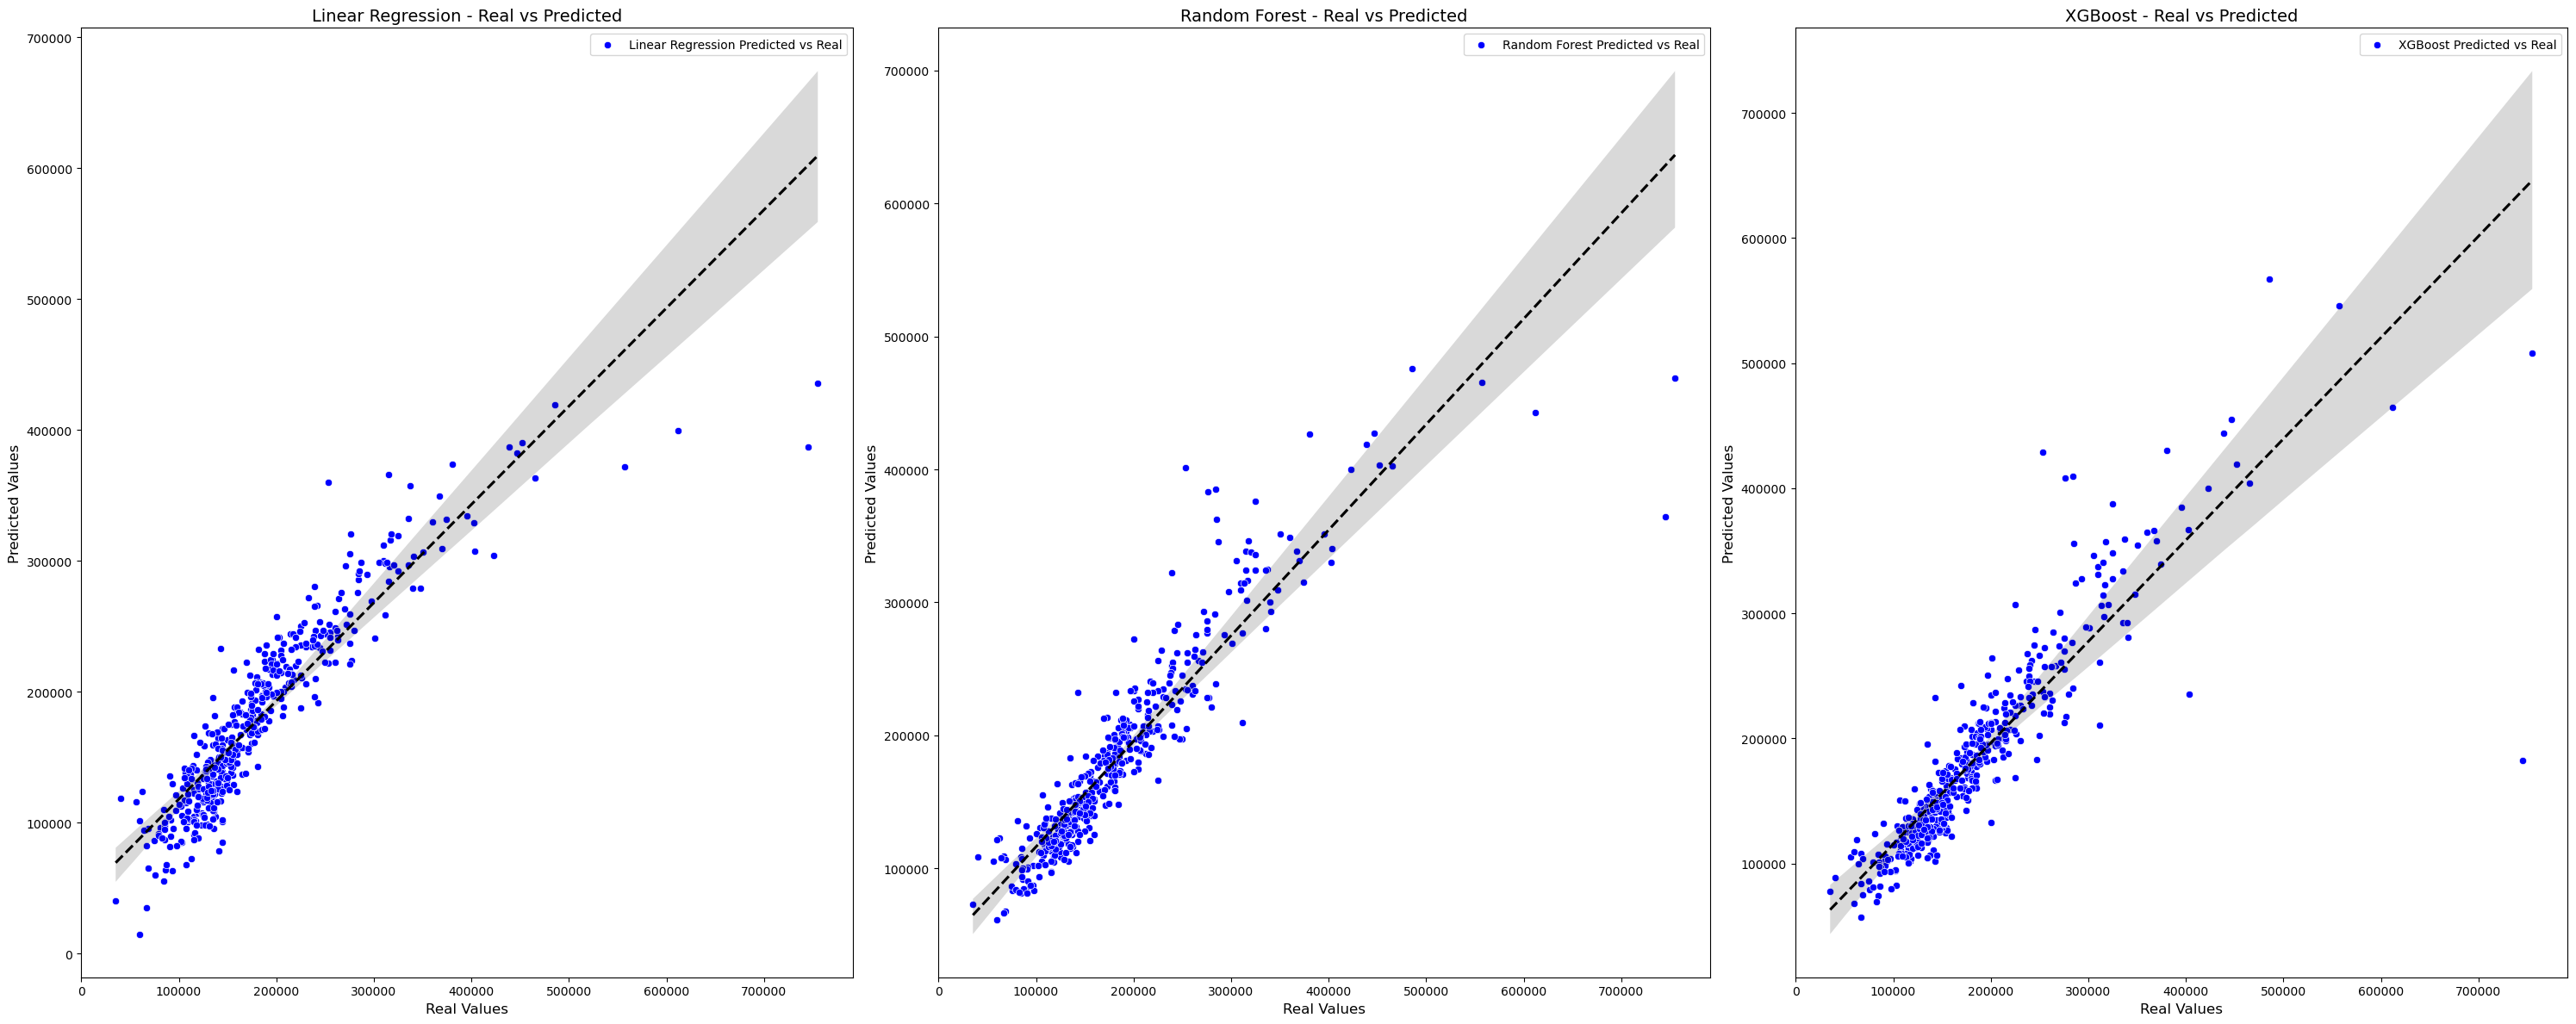

In [8]:
reg_rl = LinearRegression().fit(X_train, y_train)
reg_rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
reg_xgb = XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

y_pred_rl = reg_rl.predict(X_test)
y_pred_rf = reg_rf.predict(X_test)
y_pred_xgb = reg_xgb.predict(X_test)

mae_rl = metrics.mean_absolute_error(y_test, y_pred_rl)
mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mae_xgb = metrics.mean_absolute_error(y_test, y_pred_xgb)

mse_rl = metrics.mean_squared_error(y_test, y_pred_rl)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
mse_xgb = metrics.mean_squared_error(y_test, y_pred_xgb)

# Exibindo as métricas com formatação
print(f"{'Model':<20}{'MAE':<15}{'MSE':<15}")
print(f"{'-'*50}")
print(f"{'Linear Regression':<20}{mae_rl:<15.4f}{mse_rl:<15.4f}")
print(f"{'Random Forest':<20}{mae_rf:<15.4f}{mse_rf:<15.4f}")
print(f"{'XGBoost':<20}{mae_xgb:<15.4f}{mse_xgb:<15.4f}")

fig, axes = plt.subplots(1, 3, figsize=(30, 12), dpi=100)

models = ['Linear Regression', 'Random Forest', 'XGBoost']
predictions = [y_pred_rl, y_pred_rf, y_pred_xgb]

for i, model in enumerate(models):
    ax = axes[i]
    sns.scatterplot(x=y_test, y=predictions[i], ax=ax, color='blue', label=f'{model} Predicted vs Real')
    sns.regplot(x=y_test, y=predictions[i], scatter=False, ax=ax, color='red', line_kws={"linestyle": "dashed", "color": "black"})
    ax.set_title(f'{model} - Real vs Predicted', fontsize=14)
    ax.set_xlabel('Real Values', fontsize=12)
    ax.set_ylabel('Predicted Values', fontsize=12)
    ax.grid(False)

plt.tight_layout()
plt.show()


In [42]:
df_teste = df_teste[train_columns]
predictions = reg_rf.predict(df_teste)
df_teste['SalePrice'] = predictions
kaggle = pd.DataFrame({'Id': id_column, 'SalePrice': predictions})
kaggle.to_csv('resultado2.0.csv', index=False)

In [52]:
param_grid = {
    'LinearRegression': {},  # Sem hiperparâmetros relevantes para GridSearchCV
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

# Modelos
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

best_models = {}
results = []

In [54]:

for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    grid = GridSearchCV(model, param_grid.get(model_name, {}), cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_models[model_name] = grid.best_estimator_
    best_params = grid.best_params_
    best_score = -grid.best_score_
    
    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Best MAE (CV): {best_score:.4f}\n")
    
    # Predictions and metrics
    y_pred = grid.best_estimator_.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Best Params': best_params,
        'MAE': mae,
        'MSE': mse,
        'Predictions': y_pred
    })

# Exibindo os resultados
print(f"{'Model':<20}{'MAE':<15}{'MSE':<15}{'Best Params':<50}")
print(f"{'-'*100}")
for result in results:
    print(f"{result['Model']:<20}{result['MAE']:<15.4f}{result['MSE']:<15.4f}{result['Best Params']}")

Running GridSearchCV for LinearRegression...
Best parameters for LinearRegression: {}
Best MAE (CV): 21240.4489

Running GridSearchCV for RandomForest...
Best parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best MAE (CV): 18328.7081

Running GridSearchCV for XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best MAE (CV): 17298.0586

Model               MAE            MSE            Best Params                                       
----------------------------------------------------------------------------------------------------
LinearRegression    20975.9266     1291472448.4991{}
RandomForest        17877.7169     1132228584.4842{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
XGBoost             16969.2327     1079036537.6464{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


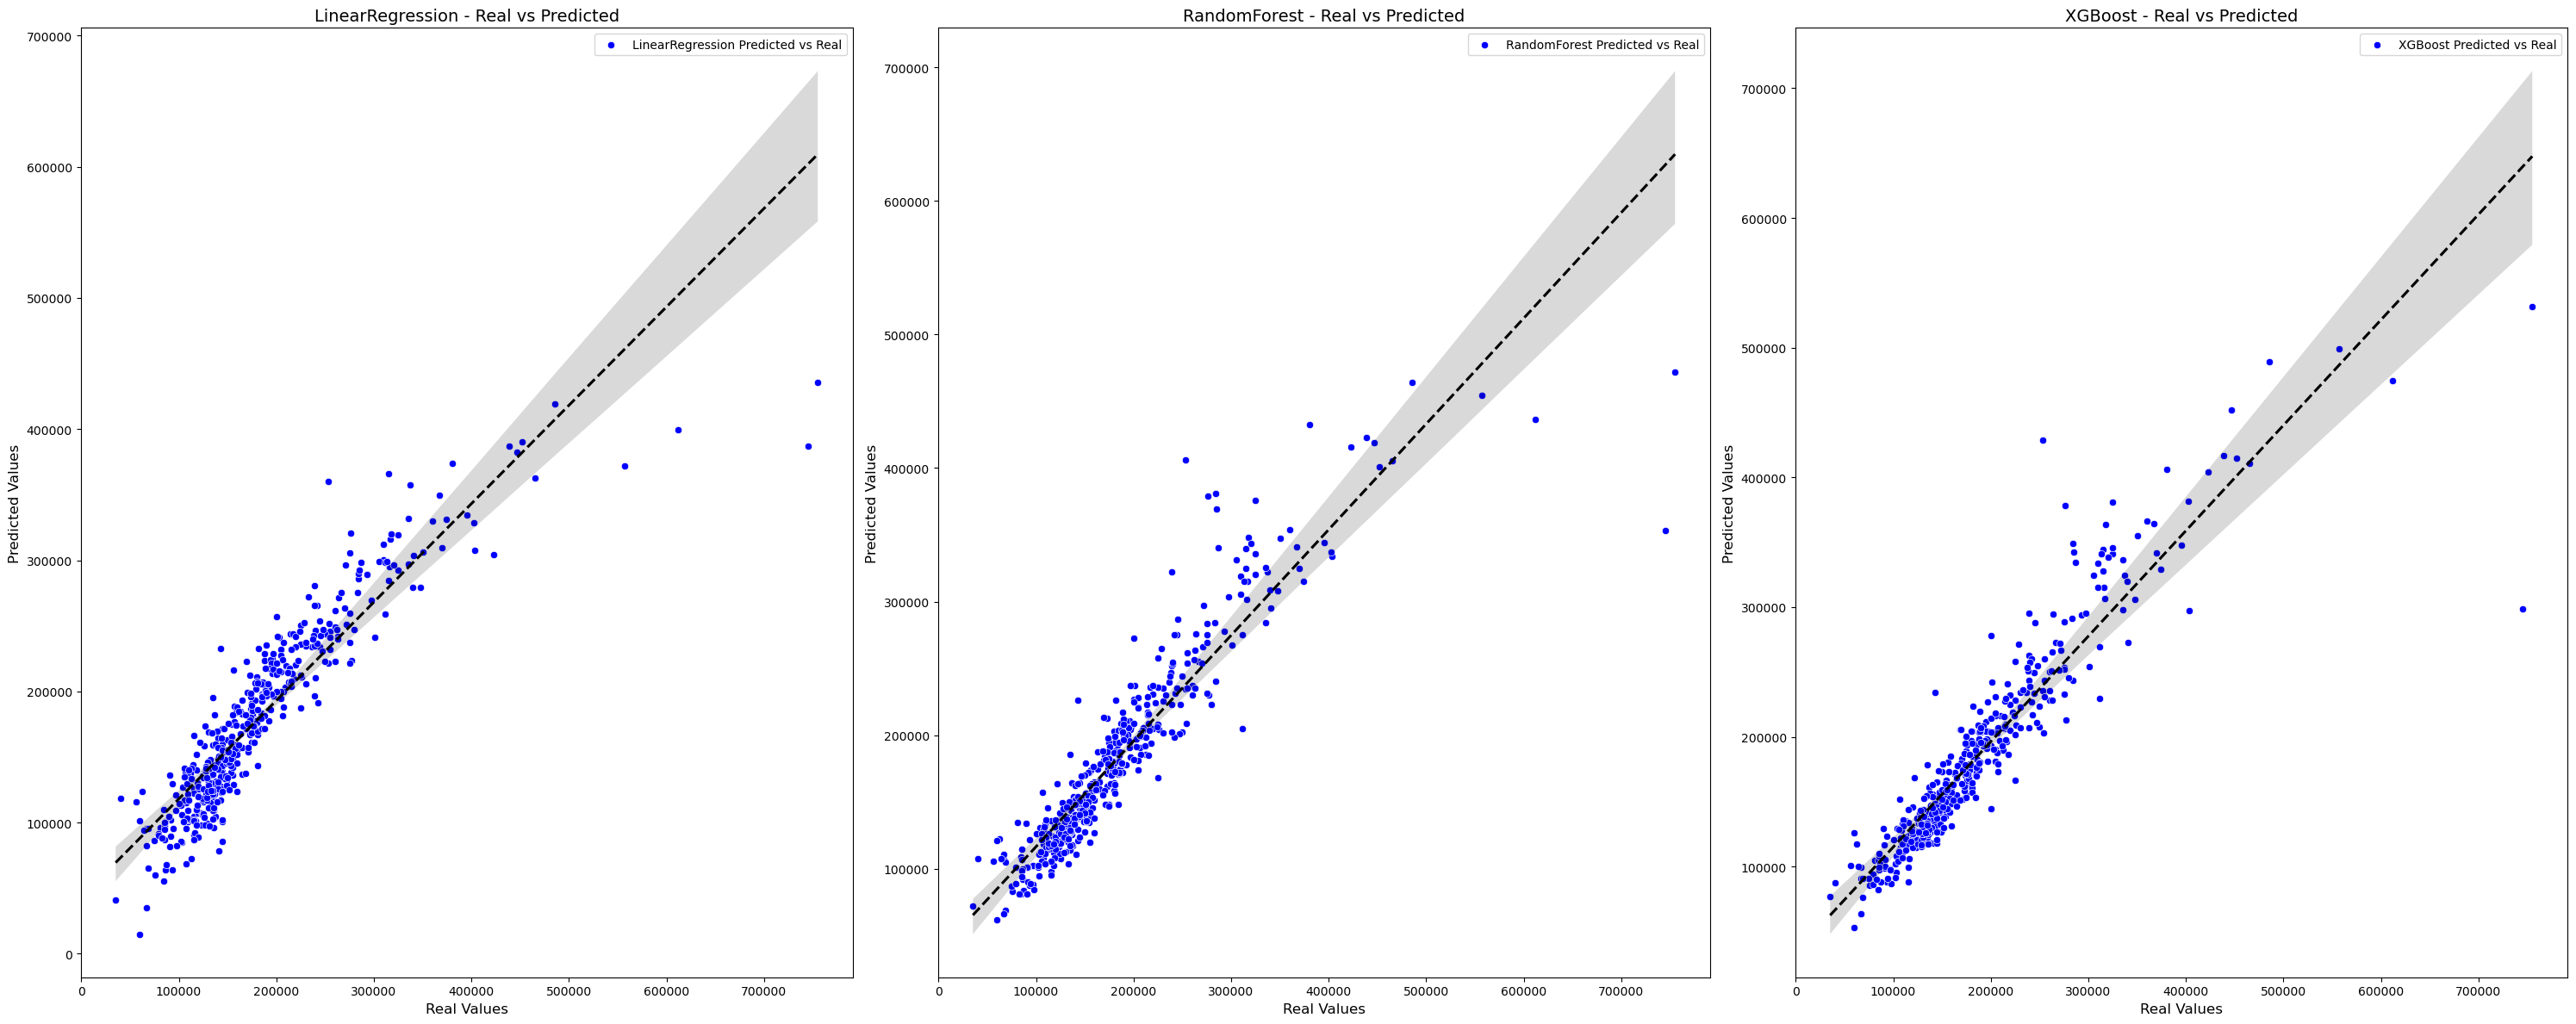

In [55]:
# Visualização dos resultados
fig, axes = plt.subplots(1, 3, figsize=(30, 12), dpi=100)

for i, result in enumerate(results):
    ax = axes[i]
    sns.scatterplot(x=y_test, y=result['Predictions'], ax=ax, color='blue', label=f"{result['Model']} Predicted vs Real")
    sns.regplot(x=y_test, y=result['Predictions'], scatter=False, ax=ax, color='red', line_kws={"linestyle": "dashed", "color": "black"})
    ax.set_title(f"{result['Model']} - Real vs Predicted", fontsize=14)
    ax.set_xlabel('Real Values', fontsize=12)
    ax.set_ylabel('Predicted Values', fontsize=12)
    ax.grid(False)

plt.tight_layout()
plt.show()


In [58]:
model = best_models['XGBoost']
id_column = df_teste['Id']
df_teste_model = df_teste[train_columns]
predictions = model.predict(df_teste_model)
kaggle = pd.DataFrame({'Id': id_column, 'SalePrice': predictions})
output_file = 'resultado_03.csv'
kaggle.to_csv(output_file, index=False)